# Решение тестового задания для стажера на позицию "Аналитик данных (Data Analyst)"

Выполнил: Денисенко Фёдор Владимирович

# Задание №1.1

Необходимо: Спрогнозировать значение UDP Throughput для сетевого устройства №3, имеющего параметры:
- тактовая частота процессора: 2 000 ГГц;
- утилизация процессора: 40%;
- температура процессора: 54 градуса Цельсия;

Решение:

Идея решения задания № 1.1 заключается в следующем. С помощью множественной линейной регрессии необходимо предсказать значение зависимой переменной - UDP Throughput, Мбит/с, по известным независимым переменным: параметру утилизации ЦП в %, параметру температуры ЦП с град С и параметру тактовой частоты процессора ГГц. Получается следующая последовательность действий:

1). Формирование таблицы со значениями параметров.

2). Расчет параметров линейной регрессии, включая коэффициенты угла наклона регрессионной прямой и выбираем наилучшую модель. 

Для этого нужно:
- построить модель со всеми независимыми переменными и найти R^2;
- убрать одну из независимых переменных, оставить остальные, снова построить модель и сравнить R^2;
- повторять для каждой независимой переменной, выбрать ту модель, у которой R^2 наибольший;
- если в выбранной модели число независимых переменных меньше, чем в изначальной, снова повторять процесс уже для найденной модели;
- повторять, пока не останется модель с минимальным числом независимых переменных и максимальным R^2.



3). Проверка соответствие регрессионной модели условиям применения линейной регрессии. Всего условий пять:
- линейная зависимость переменных;
- проверка на мультиколлинеарность;
- остатки распределены нормально;
- переменные распределены нормально, что необязательно при верности предыдущего условия;
- отсутствие гетероскедастичности.


4). В случае удовлетворения регрессионной модели условиям ее применения, расчет значения UDP Throughput для сетевого устройства №3.


Загрузка необходимых библиотек.

In [1]:
import statsmodels.formula.api as smf # библиотека для построения регрессионных моделей
import statsmodels.stats.api as sms # библиотека для проверки условий регрессии
import pandas as pd # библиотека для работы с датафреймами
import matplotlib.pyplot as plt # библиотека для построения графиков
import scipy.stats as ss # библиотека статистический функций
from statsmodels.compat import lzip # оболочка для проведения теста на гетероскидастичность
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import seaborn as sns

Обозначения для исследуемых параметров.

Y - это значение параметра UDP Throughput, Мбит/с,

Xy - это значение параметра утилизации ЦП, %,

Xt - это значение температуры ЦП, град С,

Xcp - это значение тактовой частоты процессора в ГГц.

Создание таблицы параметров.


In [2]:
data=pd.DataFrame({
    'Y':[600,650,700,750,900, 750,800, 850, 900, 600],\
    'Xy':[50,55,60,65,70,35,40,45,50,30],\
    'Xt':[38,45,52,60,67,30,31,32,33,28],\
    'Xcp':[1500,1500,1500,1500, 1500, 2600,2600,2600,2600,2600]})

data

,Y,Xy,Xt,Xcp
0,600,50,38,1500
1,650,55,45,1500
2,700,60,52,1500
3,750,65,60,1500
4,900,70,67,1500
5,750,35,30,2600
6,800,40,31,2600
7,850,45,32,2600
8,900,50,33,2600
9,600,30,28,2600


Подбор регрессионной модели при использовании всех независимых переменных. Итог: R^2 = 0.896.
При анализе множественной регрессионной модели нужно обращать внимание на Adjusted R^2, так как обычный R^2 растет вне зависимости от качества множественной регрессионной модели.

In [3]:
results_1=smf.ols('Y~Xy+Xt+Xcp',data).fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     26.78
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           0.000715
Time:                        00:15:12   Log-Likelihood:                -47.607
No. Observations:                  10   AIC:                             103.2
Df Residuals:                       6   BIC:                             104.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.2798    150.640     -3.885      0.0

/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Подбор регрессионной модели при использовании двух независимых переменных: Xy и Xt. Итог: R^2 = -0.079.

In [4]:
results_2=smf.ols('Y~Xy+Xt',data).fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                 -0.079
Method:                 Least Squares   F-statistic:                    0.6699
Date:                Thu, 18 Aug 2022   Prob (F-statistic):              0.542
Time:                        00:15:12   Log-Likelihood:                -60.064
No. Observations:                  10   AIC:                             126.1
Df Residuals:                       7   BIC:                             127.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    563.7144    171.208      3.293      0.0

/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Подбор регрессионной модели при использовании двух независимых переменных: Xy и Xcp. Итог: R^2 = 0.911.

In [5]:
results_3=smf.ols('Y~Xy+Xcp',data).fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     46.81
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           8.88e-05
Time:                        00:15:13   Log-Likelihood:                -47.612
No. Observations:                  10   AIC:                             101.2
Df Residuals:                       7   BIC:                             102.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -583.6364    138.243     -4.222      0.0

/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Подбор регрессионной модели при использовании двух независимых переменных: Xt и Xcp. Итог: R^2 = 0.0547.

In [6]:
results_4=smf.ols('Y~Xt+Xcp',data).fit()
print(results_4.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     6.432
Date:                Thu, 18 Aug 2022   Prob (F-statistic):             0.0260
Time:                        00:15:13   Log-Likelihood:                -55.725
No. Observations:                  10   AIC:                             117.4
Df Residuals:                       7   BIC:                             118.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -256.5421    281.790     -0.910      0.3

/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))





Из четырех моделей лучшей, с наибольшим R^2 оказалась третья по счету модель с двумя независимыми переменными  Xy и Xcp. R^2 = 0.911.

Необходимо проверить в этой модели действие каждой независимой переменной в отдельности. Расчет модели для Xy дает R^2 = 0.093
(Берется значение R^2, а не Adj. R^2, так как используется всего одна независимая переменная)

In [7]:
results_5=smf.ols('Y~Xy',data).fit()
print(results_5.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.8179
Date:                Thu, 18 Aug 2022   Prob (F-statistic):              0.392
Time:                        00:15:14   Log-Likelihood:                -60.453
No. Observations:                  10   AIC:                             124.9
Df Residuals:                       8   BIC:                             125.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    616.6667    151.790      4.063      0.0

/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


Расчет модели для Xср дает R^2 = 0.078

In [8]:
results_6=smf.ols('Y~Xcp',data).fit()
print(results_6.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                    0.6792
Date:                Thu, 18 Aug 2022   Prob (F-statistic):              0.434
Time:                        00:15:14   Log-Likelihood:                -60.532
No. Observations:                  10   AIC:                             125.1
Df Residuals:                       8   BIC:                             125.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    638.1818    140.473      4.543      0.0

/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


R^2 моделей с одной независимой переменной оказался меньше, чем третья по счету модель с двумя независимыми переменными Xy и Xcp и R^2 = 0.911.

Выбранная модель с наиболее удачными коэффициентами будет выглядеть так: Y=14Xy+0.3091Xcp-583.6364

Проверка выполнения условий применения регрессии.

In [9]:
линейная зависимость переменных;
проверка на мультиколлинеарность.
остатки распределены нормально;
переменные распределены нормально, что необязательно при верности предыдущего условия;
отсутствие гетероскедастичности;


SyntaxError: invalid syntax (<ipython-input-9-3b2044931dea>, line 1)

Линейная зависимость переменных отражается качеством рассчитанной модели, а именно значением R^2, близкое к 1. Значит линейная зависимость наблиюдается и первое условие выполненно.

Далее производится оценка коллинеарности между переменными с помощью коэффициента инфляции дисперсии (VIF) для проверки второго условия.

In [10]:
# Добавление константы происходит, так как в матрице независимых переменных функция variance_inflation_factor 
#ожидает столбец с константами
X = add_constant(data.drop(axis=1, labels='Y'))
pd.Series([variance_inflation_factor(X.values, i) 
for i in range(X.shape[1])], index=X.columns)

const    170.375523
Xy         8.803213
Xt         9.180187
Xcp        3.283266
dtype: float64

Получено значения VIF (коэффициента инфляции дисперсии). Обычно ориентируются на превышения VIF числа 10. При превышении убирают переменную из модели и качество предсказательной регрессионной модели повышается. В данном случае у двух переменных из трёх наблюдается значение близкое к 10, но не превышающее его. Убрав две независимые переменные из трёх, мы потеряем смысл от модели, поэтому принимается решение оставить все независимые переменные. Модель удовлетворяет условиям мильтиколлиниарности и второе условие выполнено.

Проверка третьего условия на нормальность распределения остатков начинается с нахождения остатков путем подставления найденных коэффициентов в линейное уравнение и расчета разнице между смоделированными значениями и фактическими. Затем, с помощью функции normaltest библиотеки scipy подтверждается нормальность распределения остатков. Нулевая гипотеза этой функции - распределение нормально. По значениию p-value = 0.51 видно, что статистически распределение остатков нормальное. Третье условие выполнено, а значит четвертое, можно не проверять. Остается пятое.


In [11]:
data1=data
data1['after_regresia'] = -583.6364 + data1.Xy*14 + data1.Xcp*0.3091
data1["difference"]=data1.Y-data1.after_regresia
data1

,Y,Xy,Xt,Xcp,after_regresia,difference
0,600,50,38,1500,580.0136,19.9864
1,650,55,45,1500,650.0136,-0.0136
2,700,60,52,1500,720.0136,-20.0136
3,750,65,60,1500,790.0136,-40.0136
4,900,70,67,1500,860.0136,39.9864
5,750,35,30,2600,710.0236,39.9764
6,800,40,31,2600,780.0236,19.9764
7,850,45,32,2600,850.0236,-0.0236
8,900,50,33,2600,920.0236,-20.0236
9,600,30,28,2600,640.0236,-40.0236


In [12]:
ss.normaltest(data["difference"])

/opt/tljh/user/lib/python3.7/site-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=1.3465797293405926, pvalue=0.510027891945348)

Проверка на гетероскидастичность проводится с помощью теста Голдфелда-Куандта. Его нулевая гипотеза - отсутствие гетероскидастичности. Значение p-value получилось 0.5, а значит статистически значимой гетероскидатичности нет. Пятое условие выполнено.

In [13]:
name=["F statistic", "p-value"]
test=sms.het_goldfeldquandt(results_3.resid, results_3.model.exog)
lzip(name, test)

[('F statistic', 0.9999999999999997), ('p-value', 0.5000000000000003)]

Условия использования множественной линейной регресии выполнены. Теперь можно применять полученные коэффициенты из регрессионной модели для расчета UDP Throghput. При этом в модели отсутствует коэффициент для параметра температуры в виду низкой корреляции температуры и UDP Theoghput.

In [14]:
UDP_2000_GGc=-583.6364+40*14+2000*0.3091
UDP_2000_GGc

594.5636

Ответ: 

Значение UDP Throghput для сетевого устройства №3 равно 594 Мбит/с

# Задание № 1.2

Необходимо: спрогнозировать значения утилизации ЦП и температуры ЦП сетевого устройства №4 с тактовой частотой 1 700 ГГц для значений UDP Thtoughput.

Решение:


Идея решения задания № 1.2 заключается в следующем. Значения утилизации ЦП находятся по формуле регрессии. Значения температуры находятся подругому, так как они слабо коррелируют с UDP Througput.  Раз имеются значения температуры для тактовой частоты 1500 ГГц и для 2600 ГГц, значит можно узнать зависимости только температуры ЦП от UDP Througput. Если это две линейные зависимости, то можно построить третью линию между известными двумя для 1500 ГГц и 2600 ГГц, которая будет соответствовать 1700 ГГц. Точки на этой линии будут соответствовать значениям температуры ЦП при каждом значении UDP Througput. Получается следующая последовательность действий:

1). Рассчитывается утилизация ЦП по коэффициентам из регрессионной модели для каждого значения UDP Througput при 1700 ГГц.

2). Находятся коэффициенты регрессии для сетевого устройства № 1 (1500 ГГц) и для сетевого устройства № 2 (2600 ГГц).

3). Вычисляются значения температуры ЦП для устройств № 1 и № 2 в точках 400 Мбит/с и 500 Мбит/с.

4). Вычисляются значения температуры ЦП для устройства № 4 в точках 400 Мбит/с и 500 Мбит/с.

5). Находятся коэффициенты регрессии для сетевого устройства № 4.

6). Вычисляются значения температуры для сетевого устройства № 4 при каждом значении UDP Througput.



Обозначения для исследуемых параметров те же, что и в предыдущем задании.

Y - это значение параметра UDP Throughput, Мбит/с,

Xy - это значение параметра утилизации ЦП, %,

Xt - это значение температуры ЦП, град С,

Xcp - это значение тактовой частоты процессора в ГГц.

Известные параметры UDP Throughput, Мбит/с представлены в листе Y

In [15]:
Y=(50, 100, 150, 200, 250, 300, 350, 400, 450, 500)
Y

(50, 100, 150, 200, 250, 300, 350, 400, 450, 500)

На этом шаге рассчитывается утилизация ЦП по коэффициентам из регрессионной модели для каждого значения UDP Througput при 1700 ГГц. Уравнение составлено с одной независимой переменной на основе регрессионной модели из задания 1.1, где  Y=14Xy+0.3091Xcp-583.6364

In [16]:
data_Xy = pd.DataFrame(columns = ['Y','Xcp','Xy'])
for i in Y:
    Xy=(i - 0.3091*1700-(-583.6364) )/14
    data_Xy = data_Xy.append({'Xy':Xy,'Xcp':1700,'Y':i}, ignore_index=True)
data_Xy

,Y,Xcp,Xy
0,50.0,1700.0,7.726171
1,100.0,1700.0,11.297600
2,150.0,1700.0,14.869029
3,200.0,1700.0,18.440457
4,250.0,1700.0,22.011886
5,300.0,1700.0,25.583314
6,350.0,1700.0,29.154743
7,400.0,1700.0,32.726171
8,450.0,1700.0,36.297600
9,500.0,1700.0,39.869029


Далее идет подготовка данных для построения регрессионной модели для каждого сетевого устройства. Эта регрессионная модель будет иметь только один предикат: температуру ЦП. Получается зависимость UDP Throughput от температуры ЦП. Ниже представлены две таблицы: regressia_1500 для сетевого устройства № 1, regressia_2600 для сетевого устройства № 2.

In [17]:
regressia_1500=pd.DataFrame({
    'Y':data.Y.head(5),\
    'Xt_1500':data.Xt.head(5)})
regressia_1500

,Y,Xt_1500
0,600,38
1,650,45
2,700,52
3,750,60
4,900,67


In [18]:
regressia_2600=pd.DataFrame({
    'Y':data.Y.tail(5),\
    'Xt_2600':data.Xt.tail(5)})
regressia_2600

,Y,Xt_2600
5,750,30
6,800,31
7,850,32
8,900,33
9,600,28


Далее необходимо посроить регрессионную модель для № 1 и № 2 сетевых устройств, к которой применяются уже менне жесткие требования, нежели для множественной регрессии.

In [19]:
#регрессия только от температуры для 1500 ГГЦ
results=smf.ols('Y~Xt',data.head(5)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     36.48
Date:                Thu, 18 Aug 2022   Prob (F-statistic):            0.00910
Time:                        00:15:21   Log-Likelihood:                -23.823
No. Observations:                   5   AIC:                             51.65
Df Residuals:                       3   BIC:                             50.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    217.8170     84.746      2.570      0.0

/opt/tljh/user/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


In [20]:
#регрессия только от температуры для 2600 ГГц
results=smf.ols('Y~Xt',data.tail(5)).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     232.3
Date:                Thu, 18 Aug 2022   Prob (F-statistic):           0.000613
Time:                        00:15:21   Log-Likelihood:                -19.360
No. Observations:                   5   AIC:                             42.72
Df Residuals:                       3   BIC:                             41.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1051.3514    120.339     -8.737      0.0

/opt/tljh/user/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


Далее производится вычисление UDP для каждого значения Xt для проверки корректности модели. Действительно значения Y и Y(Xt) близки

In [21]:
regressia_1500['Y(Xt)']=regressia_1500.Xt_1500 * 9.5836 +  217.8170 
regressia_1500

,Y,Xt_1500,Y(Xt)
0,600,38,581.9938
1,650,45,649.0790
2,700,52,716.1642
3,750,60,792.8330
4,900,67,859.9182


In [22]:
regressia_2600['Y(Xt)']=regressia_2600.Xt_2600 * 59.4595  - 1051.3514 
regressia_2600

,Y,Xt_2600,Y(Xt)
5,750,30,732.4336
6,800,31,791.8931
7,850,32,851.3526
8,900,33,910.8121
9,600,28,613.5146


Далее производится расчет для значений UDP, которых нет в исходных данных: 500 Мбит/с и 400 Мбит/с

In [23]:
Xt_regression_1500_500 = (500 - 217.8170) / 9.5836
new_row = {'Y':500, 'Xt_1500':Xt_regression_1500_500}
regressia_1500_new_values = regressia_1500.append(new_row, ignore_index=True)
Xt_regression_1500_400 = (400 - 217.8170) / 9.5836
new_row = {'Y':400, 'Xt_1500':Xt_regression_1500_400}
regressia_1500_new_values = regressia_1500_new_values.append(new_row, ignore_index=True)
regressia_1500_new_values

,Y,Xt_1500,Y(Xt)
0,600.0,38.000000,581.9938
1,650.0,45.000000,649.0790
2,700.0,52.000000,716.1642
3,750.0,60.000000,792.8330
4,900.0,67.000000,859.9182
5,500.0,29.444363,NaN
6,400.0,19.009871,NaN


In [24]:
Xt_regression_2600_500 = (500 + 1051.3514) / 59.4595
new_row = {'Y':500, 'Xt_2600':Xt_regression_2600_500}
regressia_2600_new_values = regressia_2600.append(new_row, ignore_index=True)
Xt_regression_2600_400 = (400 + 1051.3514) / 59.4595
new_row = {'Y':400, 'Xt_2600':Xt_regression_2600_400}
regressia_2600_new_values = regressia_2600_new_values.append(new_row, ignore_index=True)
regressia_2600_new_values

,Y,Xt_2600,Y(Xt)
0,750.0,30.000000,732.4336
1,800.0,31.000000,791.8931
2,850.0,32.000000,851.3526
3,900.0,33.000000,910.8121
4,600.0,28.000000,613.5146
5,500.0,26.090892,NaN
6,400.0,24.409075,NaN


Далее производится расчет "относительного расстояния" между регрессионными линиями для сетевых устройств № 1 и № 2. Относительное расстояние между тактовыми частотами 2600 ГГц и 1500 ГГц, полностью аналогично расстоянию между линиями зависимостей UDP от температуры этих же сетевых устройств.

In [25]:
(1700-1500)/(2600-1500)

0.18181818181818182

0.1818 показывает, что линия сетевого устройства № 4 лежит на относительном расстоянии 18/100 между линиями сетевых устройств № 1 и № 2, соответственно ближе к линии сетевого устройства № 1.

Отделяем только данные для значений 400 Мбит/с и 500 Мбит/с.

In [26]:
regressia_2600_500_600=regressia_2600_new_values.drop(axis=0, index=[0,1,2,3,4])
regressia_2600_500_600=regressia_2600_500_600.drop(axis=1, labels='Y(Xt)')
regressia_2600_500_600

,Y,Xt_2600
5,500.0,26.090892
6,400.0,24.409075


In [27]:
regressia_1500_500_600=regressia_1500_new_values.drop(axis=0, index=[0,1,2,3,4])
regressia_1500_500_600=regressia_1500_500_600.drop(axis=1, labels='Y(Xt)')
regressia_1500_500_600

,Y,Xt_1500
5,500.0,29.444363
6,400.0,19.009871


Объединяем данные для сетевых устройств № 1 и № 2

In [28]:
regressia_500_600=regressia_1500_500_600.merge(regressia_2600_500_600, on='Y')
regressia_500_600

,Y,Xt_1500,Xt_2600
0,500.0,29.444363,26.090892
1,400.0,19.009871,24.409075


Вычисление значений температуры для сетевого устройства № 4

In [29]:
regressia_500_600['Xt_1700']=(regressia_500_600.Xt_2600-regressia_500_600.Xt_1500)*0.18181818181818182+regressia_500_600.Xt_1500
regressia_1700_500_600=regressia_500_600
regressia_1700_500_600

,Y,Xt_1500,Xt_2600,Xt_1700
0,500.0,29.444363,26.090892,28.834641
1,400.0,19.009871,24.409075,19.991544


Вычисление параметров регресси для сетевого устройства № 4

In [30]:
#регрессия только от температуры для 1700 ГГЦ
results=smf.ols('Y~Xt_1700',regressia_1700_500_600).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 18 Aug 2022   Prob (F-statistic):                nan
Time:                        00:15:25   Log-Likelihood:                 56.773
No. Observations:                   2   AIC:                            -109.5
Df Residuals:                       0   BIC:                            -112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    173.9305        inf          0        n

/opt/tljh/user/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  "samples were given." % int(n), ValueWarning)
/opt/tljh/user/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1751: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/tljh/user/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/opt/tljh/user/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1673: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


По результатам регрессии производится расчет значений температуры при каждом значениее UDP

In [31]:
data_Xy['Xt']=(data_Xy.Y-173.9305)/11.3083
data_Xy=data_Xy.round(0)
data_Xy

,Y,Xcp,Xy,Xt
0,50.0,1700.0,8.0,-11.0
1,100.0,1700.0,11.0,-7.0
2,150.0,1700.0,15.0,-2.0
3,200.0,1700.0,18.0,2.0
4,250.0,1700.0,22.0,7.0
5,300.0,1700.0,26.0,11.0
6,350.0,1700.0,29.0,16.0
7,400.0,1700.0,33.0,20.0
8,450.0,1700.0,36.0,24.0
9,500.0,1700.0,40.0,29.0


Получились отрицательные значения температуры, что не может быть в комнатных условиях с температурой воздуха 18 градусов по Цельсию. Произведем замену значений температуры ниже 18 градсов Цельсия на 18 градусов. Это обосновано термодинамическими законами. Сетевое устройство будет поддерживать температуру окружающего воздуха при UDP от 50 Мбит/с до 350 Мбит/с.

In [32]:
Xy_new=[]
for i in data_Xy.Xt:
    if i <= 18:
        Xy_new.append(18)
    else:
        Xy_new.append(i)
Xy_new

[18, 18, 18, 18, 18, 18, 18, 20.0, 24.0, 29.0]

In [33]:
data_Xy['Xt_new']=Xy_new




In [34]:
data_Xy = data_Xy.drop(axis=1, labels='Xt')

Визуализация полученных данных показана на графиках ниже.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Температура ЦП, град С')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


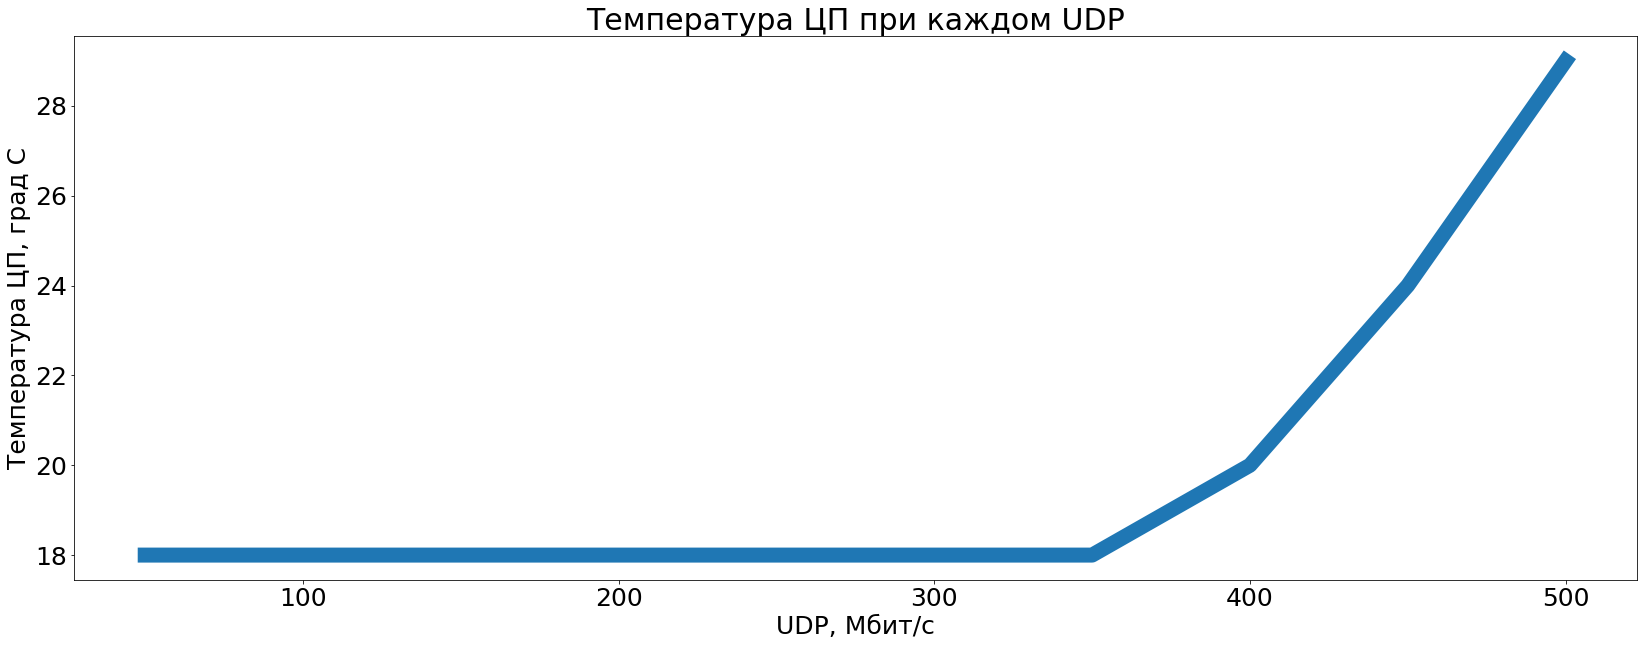

In [35]:
font = {'family': 'normal', 'size':'25'}
plt.rc('font',**font)
plt.figure(figsize=(28,10))
ax1=sns.lineplot(data_Xy.Y,data_Xy.Xt_new, linewidth=15)
ax1.set_title('Температура ЦП при каждом UDP')
ax1.set_xlabel('UDP, Мбит/с')
ax1.set_ylabel('Температура ЦП, град С')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Утилизация ЦП, %')

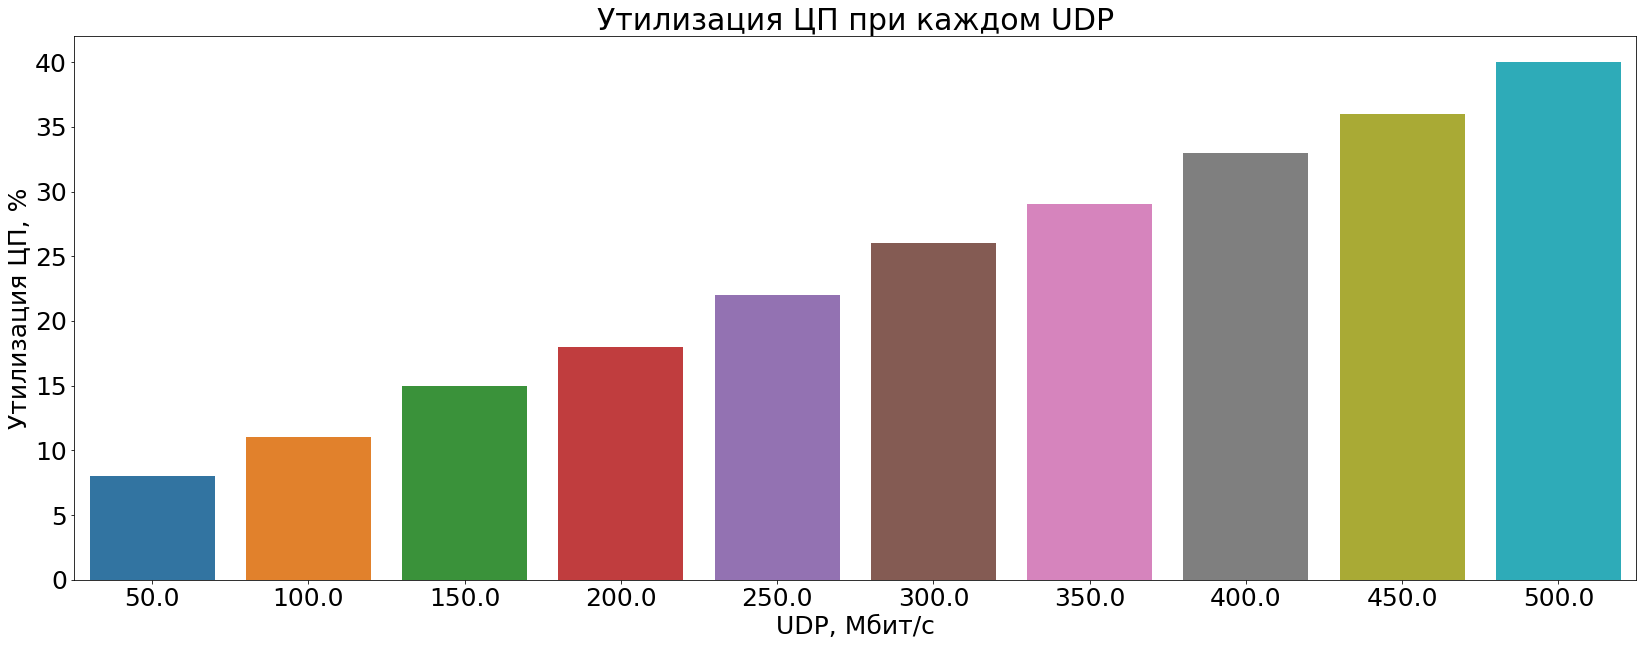

In [36]:
font = {'family': 'normal', 'size':'25'}
plt.rc('font',**font)
plt.figure(figsize=(28,10))
ax2=sns.barplot(data_Xy.Y,data_Xy.Xy)
ax2.set_title('Утилизация ЦП при каждом UDP')
ax2.set_xlabel('UDP, Мбит/с')
ax2.set_ylabel('Утилизация ЦП, %')

Ответ: Ниже представлена таблица для прогноза утилизации и температуры ЦП сетевого устройства № 4

In [37]:
data_Xy

,Y,Xcp,Xy,Xt_new
0,50.0,1700.0,8.0,18.0
1,100.0,1700.0,11.0,18.0
2,150.0,1700.0,15.0,18.0
3,200.0,1700.0,18.0,18.0
4,250.0,1700.0,22.0,18.0
5,300.0,1700.0,26.0,18.0
6,350.0,1700.0,29.0,18.0
7,400.0,1700.0,33.0,20.0
8,450.0,1700.0,36.0,24.0
9,500.0,1700.0,40.0,29.0


Y - это значение параметра UDP Throughput, Мбит/с,

Xcp - это значение тактовой частоты процессора в ГГц,

Xy - это значение параметра утилизации ЦП, %,

Xt_new - это значение температуры ЦП, град С,

# Задание № 2

Необходимо: подготовить требования к методике нагрузочного тестирования сетевых устройств.
    

По найденной модели находим UDP Throughput
UDP_2000_GGc=-583.6364+Xy * 14+Xcp * 0.3091

Параметры сетевого устройства № 1 представлены ниже. Необходимо посчитать по регрессионной модели значения параметра утилизации и по регрессии для температуры для сетевого устройства № 1 посчитать параметры температуры. При температуре меньше 18 градусов по Цельсию нужно оставить 18. Далее нужно убрать те значения, которые не удовлетворяют требованиям к сетевым устройствам из задания 2. Тоже сделать для остальных сетевых устройств.

In [38]:
Equipment_1 = pd.DataFrame({
    'Y':[100,200,300,400,500, 600,700, 800, 900],\
    'Xcp':[1500,1500,1500,1500, 1500, 1500,1500,1500,1500]})
Equipment_1['Xy'] = ((Equipment_1.Y + 583.6364 - 0.3091 * Equipment_1.Xcp) / 14)
Equipment_1['Xt']=(Equipment_1.Y - 217.8170) / 9.5836
Xy_new=[]
for i in Equipment_1.Xt:
    if i <= 18:
        Xy_new.append(18)
    else:
        Xy_new.append(i)
Xy_new
Equipment_1['Xt_new']=Xy_new
Equipment_1=Equipment_1.round(0)
Equipment_1=Equipment_1.drop(axis=1, labels='Xt')
Equipment_1=Equipment_1.drop(axis=0, index=8)
Equipment_1=Equipment_1.drop(axis=0, index=7)
Equipment_1

,Y,Xcp,Xy,Xt_new
0,100,1500,16.0,18.0
1,200,1500,23.0,18.0
2,300,1500,30.0,18.0
3,400,1500,37.0,19.0
4,500,1500,44.0,29.0
5,600,1500,51.0,40.0
6,700,1500,59.0,50.0


Параметры сетевого устройства № 2 представлены ниже

In [39]:
# Так как отрицательных значений в утилизации ЦП быть не может, нужно заменить их на ноль. Для этого создан первый цикл for.
Equipment_2 = pd.DataFrame({
    'Y':[100,200,300,400,500, 600,700, 800, 900],\
    'Xcp':[2600,2600,2600,2600, 2600, 2600,2600,2600,2600]})
Equipment_2['Xy'] = ((Equipment_2.Y + 583.6364 - 0.3091 * Equipment_2.Xcp) / 14)
Equipment_2['Xt']=(Equipment_2.Y + 1051.3514) / 59.4595
Xy_new=[]
for i in Equipment_2.Xy:
    if i <= 0:
        Xy_new.append(0)
    else:
        Xy_new.append(i)
Equipment_2['Xy_new']=Xy_new
Equipment_2
Xt_new=[]
for i in Equipment_2.Xt:
    if i <= 18:
        Xt_new.append(18)
    else:
        Xt_new.append(i)
Xt_new
Equipment_2['Xt_new']=Xt_new
Equipment_2=Equipment_2.round(0)
Equipment_2=Equipment_2.drop(axis=1, labels='Xt')
Equipment_2=Equipment_2.drop(axis=1, labels='Xy')
Equipment_2

,Y,Xcp,Xy_new,Xt_new
0,100,2600,0.0,19.0
1,200,2600,0.0,21.0
2,300,2600,6.0,23.0
3,400,2600,13.0,24.0
4,500,2600,20.0,26.0
5,600,2600,27.0,28.0
6,700,2600,34.0,29.0
7,800,2600,41.0,31.0
8,900,2600,49.0,33.0


Произведем расчет для сетевого устройства № 3

In [40]:
(2000-1500)/(2600-1500)

0.45454545454545453

In [41]:
regressia_500_600['Xt_2000']=(regressia_500_600.Xt_2600-regressia_500_600.Xt_1500)*0.454545+regressia_500_600.Xt_1500
regressia_2000_500_600=regressia_500_600
regressia_2000_500_600

,Y,Xt_1500,Xt_2600,Xt_1700,Xt_2000
0,500.0,29.444363,26.090892,28.834641,27.920060
1,400.0,19.009871,24.409075,19.991544,21.464052


In [42]:
#регрессия только от температуры для 2000 ГГЦ
results=smf.ols('Y~Xt_2000',regressia_2000_500_600).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 18 Aug 2022   Prob (F-statistic):                nan
Time:                        00:15:29   Log-Likelihood:                 58.159
No. Observations:                   2   AIC:                            -112.3
Df Residuals:                       0   BIC:                            -114.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     67.5337        inf          0        n

/opt/tljh/user/lib/python3.7/site-packages/statsmodels/stats/stattools.py:75: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  "samples were given." % int(n), ValueWarning)
/opt/tljh/user/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1751: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/tljh/user/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/opt/tljh/user/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1673: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


Параметры сетевого устройства № 3 представлены ниже

In [43]:
Equipment_3 = pd.DataFrame({
    'Y':[100,200,300,400,500, 600,700, 800, 900],\
    'Xcp':[2000,2000,2000,2000, 2000, 2000,2000,2000,2000]})
Equipment_3['Xy'] = ((Equipment_3.Y + 583.6364 - 0.3091 * Equipment_3.Xcp) / 14)
Equipment_3['Xt']=(Equipment_3.Y - 67.5337) / 15.4894
Xt_new=[]
for i in Equipment_3.Xt:
    if i <= 18:
        Xt_new.append(18)
    else:
        Xt_new.append(i)
Xt_new
Equipment_3['Xt_new']=Xt_new
Equipment_3=Equipment_3.round(0)
Equipment_3=Equipment_3.drop(axis=1, labels='Xt')
Equipment_3

,Y,Xcp,Xy,Xt_new
0,100,2000,5.0,18.0
1,200,2000,12.0,18.0
2,300,2000,19.0,18.0
3,400,2000,26.0,21.0
4,500,2000,33.0,28.0
5,600,2000,40.0,34.0
6,700,2000,48.0,41.0
7,800,2000,55.0,47.0
8,900,2000,62.0,54.0


Параметры сетевого устройства № 4 представлены ниже

In [46]:
Y=(100, 200, 300, 400, 500, 600, 700, 800, 900)
Y

(100, 200, 300, 400, 500, 600, 700, 800, 900)

In [47]:
Equipment_4 = pd.DataFrame(columns = ['Y','Xcp','Xy'])
for i in Y:
    Xy=(i - 0.3091*1700-(-583.6364) )/14
    Equipment_4 = Equipment_4.append({'Xy':Xy,'Xcp':1700,'Y':i}, ignore_index=True)
Equipment_4

,Y,Xcp,Xy
0,100.0,1700.0,11.297600
1,200.0,1700.0,18.440457
2,300.0,1700.0,25.583314
3,400.0,1700.0,32.726171
4,500.0,1700.0,39.869029
5,600.0,1700.0,47.011886
6,700.0,1700.0,54.154743
7,800.0,1700.0,61.297600
8,900.0,1700.0,68.440457


In [50]:
Equipment_4['Xt']=(Equipment_4.Y-173.9305)/11.3083
Xt_new=[]
for i in Equipment_4.Xt:
    if i <= 18:
        Xt_new.append(18)
    else:
        Xt_new.append(i)
Xt_new
Equipment_4['Xt_new']=Xt_new
Equipment_4=Equipment_4.round(0)
Equipment_4=Equipment_4.drop(axis=1, labels='Xt')
Equipment_4=Equipment_4.drop(axis=0, index=8)
Equipment_4

,Y,Xcp,Xy,Xt_new
0,100.0,1700.0,11.0,18.0
1,200.0,1700.0,18.0,18.0
2,300.0,1700.0,26.0,18.0
3,400.0,1700.0,33.0,20.0
4,500.0,1700.0,40.0,29.0
5,600.0,1700.0,47.0,38.0
6,700.0,1700.0,54.0,47.0
7,800.0,1700.0,61.0,55.0


Цели: 

1). Выявить влияние нагрузки на аппаратные ресурсы.

2). Получить подтверждение, что система удовлетворяет предъявляемым требованиям производительности и максимальной производительности.


Определения терминов:

Метод измерения производительности – описание целей, условий, требований, алгоритма, необходимых для верного выявления параметров объекта и корректного представления полученных результатов.

Методика нагрузочного тестирования – порядок действий для проверки соответствия параметров устройства предъявляемым требованиям, рассчитываемым заранее для каждой степени загруженности устройства.


Аппараты:

- Компьютер (ПК);
- Windows 10 (7);
- Датчик температуры;
- Плата Arduino Uno с ПО Arduino;
- Соединительные провода;
- Провод USB 2.0 (А-В);
- Интернет, подключенный к ПК;
- Плата для бессварочного соединения проводов.

Условия:

Необходимые условия:

- Человек-исполнитель;
- Компьютер;
- Испытываемые сетевые устройства;
- Теоретически рассчитанные параметры сетевого устройства.

Достаточные условия:

- Наличие плана;
- Наличие платы Arduino Uno;
- Наличие операционной системы Windows 10;
- Наличие комплекта проводов;
- Наличие платы для бессварочного соединения проводов;
- Наличие датчика температуры;
- Наличие ПО Iperf, и Arduino;
- Написанная программа на C++ для Arduino UNO;
- Наличие отчета, подтверждающего выполнение задач.

Требования для каждого сетевого устройства:

Требования представлены в таблицах перед описанием метода. По этим таблицам необходимо сравнивать измеренные в ходе эксперемента значения утилизации ЦП, температуры ЦП и UDP Throughput. При этом значение утилизации ЦП должно быть не выше 80%, температуры ЦП не выше 60 градусов Цельсия, и UDP Throughput не менее 900 Мбит/с.

Исходя из требований видно, что устройства № 1 и № 4 не подходят под требования. Это должно быть получено и при экспериментах.

Алгоритм действия (методика):

1.	С помощью термопасты установить датчик температуры на плату сетевого устройства;

2.	Присоединить проводами датчик температуры к плате для бессварочного соединения. Затем плату соединить с микроконтроллером Arduino UNO, который подключить с помощью USB 2.0 (А-В) к компьютеру;

3.	Написать программу для Arduino UNO на языке C++ для считывания аналоговых сигналов с датчика температуры и перевода аналогового сигнала в цифровой код;

4.	Включить ПК. Скачать утилиту Iperf и запустить ее;

5.	Открыть ПО Arduino. Запустить написанную программу. В окне исполнителя кода должно появиться текущее значение температуры в градусах Цельсия, соответствующее температуре в помещении, где производится исследование.

6.	Зайти в YouTube. Найти длинное видео с длительностью 10 часов. Скопировать URL видео. Вставить URL в поле поиска в браузере, добавив «ss» после «https://». Начнётся скачивание видео. 

7.	За время скачивания нужно произвести измерения параметров работы сетевого устройства. Для этого нужно открыть диспетчер задач (Ctrl + Alt + Delete), затем нажать «Диспетчер задач», зайти во вкладку «Производительность» и отслеживать параметр «Использование» в процентах. Именно этот параметр соответствует параметру «Утилизация ЦП, %».

8.	Кроме того, во время скачивания нужно произвести измерения UDP Throughput. Для этого зайти с помощью клавиш Win + R в командное окно и вызвать команду: «gpedit.msc». В появившемся окне открыть вкладку «Административные шаблоны».  Затем развернуть папку «Сеть» и далее «Планировщик пакетов QoS». Далее открыть «Ограничить резервируемую пропускную способность». В появившемся окне выставить настройку: «Включено» и прописать в строке «Ограничение пропускной способности (%) число 95%. Для дальнейших значений пропускной способности при других значениях нагрузки уменьшать процент ограничителя, выставляя меньшие числа при большей нагрузке.

9.	Также, во время скачивания файла нужно зафиксировать показания датчика температуры. Для этого нужно в ПО Arduino зафиксировать значение температуры спустя 2 минуты после изменения пропускной способности в пункте 8). 

10.	Пункты 7, 8, 9 повторять для каждого значения таблицы требований и для каждого сетевого устройства.


После выполнения алгоритма нужно произвести анализ полученных результатов и рассчитать то, насколько отличаются полученные в ходе замеров значения от теоретических. Пдопустимый интервал погрешности +-15%. 


В конце работы делается выод о том как влияет нагрузка на аппаратные ресурсы. Также нужно указать удовлетворяет ли каждое сетевое устройство предъявляемым требованиям производительности и максимальной производительности.
